# LIS


understanding the difference between Subarray, Subsequence and Subset

- A subarray is a contiguous part of array and maintains relative ordering of elements. For an array/string of size n, there are $\frac{n*(n+1)}2$ non-empty subarrays/substrings.

- A subsequence maintain relative ordering of elements but may or may not be a contiguous part of an array. For a sequence of size n, we can have $2^n-1$ non-empty sub-sequences in total.

- A subset MAY NOT maintain relative ordering of elements and can or cannot be a contiguous part of an array. For a set of size n, we can have $2^n$ sub-sets in total.

Let us understand it with an example.

Consider an array:

array = [1,2,3,4]

Subarray : [1,2],[1,2,3] - is continous and maintains relative order of elements

Subsequence: [1,2,4] - is not continous but maintains relative order of elements

Subset: [1,3,2] - is not continous and does not maintain relative order of elements

Some interesting observations :

Every Subarray is a Subsequence.
Every Subsequence is a Subset.


In [28]:
import random
import time
import matplotlib.pyplot as plt
from timeit import default_timer as timer

# backtracking


In [29]:
def lis_back(nums):
    n = len(nums)
    # Initialize the current longest increasing subsequence
    curr_lis = []

    # Helper function to explore the solution space recursively
    def dfs(pos, path):
        nonlocal curr_lis
        if len(path) > len(curr_lis):
            curr_lis = path
        if pos == n:
            return
        if nums[pos] > path[-1]:
            dfs(pos+1, path+[nums[pos]])
        dfs(pos+1, path)

    # Explore the solution space starting from each position
    for i in range(n):
        dfs(i+1, [nums[i]])

    return curr_lis


lis_back([1, 3, 9, 6, 2, 9, 9])

[1, 3, 6, 9]

# branch and bound


In [30]:
def lis_rec_len(nums):
    n = len(nums)
    # Initialize the current longest increasing subsequence
    curr_lis = []

    # Helper function to explore the solution space recursively
    def dfs(pos, path):
        nonlocal curr_lis
        if len(path) > len(curr_lis):
            curr_lis = path
        if pos == n:
            return
        # if the length the path + remaining element in the set is less or equal to the length of current lis
        # then there is no point in exploring further with path being the lis we have found up to this node
        if len(path) + n - pos <= len(curr_lis):
            return
        if nums[pos] > path[-1]:
            dfs(pos+1, path+[nums[pos]])
        dfs(pos+1, path)

    # Explore the solution space starting from each position
    for i in range(n):
        dfs(i+1, [nums[i]])

    return curr_lis


lis_rec_len([1, 3, 9, 6, 2, 9, 9])

[1, 3, 6, 9]

In [31]:
def lis_len(nums):
    n = len(nums)
    # Initialize the current longest increasing subsequence
    curr_lis = []

    # Stack to keep track of the DFS
    stack = []
    # Push the initial states onto the stack
    for i in range(n):
        stack.append((i, [nums[i]]))

    # Explore the solution space
    while stack:
        pos, path = stack.pop()
        if len(path) > len(curr_lis):
            curr_lis = path
        if pos == n:
            continue
        # if the length the path + remaining element in the set is less or equal to the length of current lis
        # then there is no point in exploring further with path being the lis we have found up to this node
        if len(path) + n - pos <= len(curr_lis):
            continue
        if nums[pos] > path[-1]:
            stack.append((pos+1, path+[nums[pos]]))
        stack.append((pos+1, path))

    return curr_lis


lis_len([1, 3, 9, 6, 2, 9, 9])

[1, 3, 6, 9]

In [32]:
def lis_rec_max(nums):
    n = len(nums)
    # Initialize the current longest increasing subsequence
    curr_lis = []

    # Helper function to explore the solution space recursively
    def dfs(pos, path):
        nonlocal curr_lis
        if len(path) > len(curr_lis):
            curr_lis = path
        if pos == n:
            return
        # if the there is no element in the remaining list is > the last element in path (largest) then no need to bother explore further
        if path[-1] > max(nums[pos:]):
            return
        if nums[pos] > path[-1]:
            dfs(pos+1, path+[nums[pos]])
        dfs(pos+1, path)

    # Explore the solution space starting from each position
    for i in range(n):
        dfs(i+1, [nums[i]])

    return curr_lis


lis_rec_max([1, 3, 9, 6, 2, 9, 9])

[1, 3, 6, 9]

In [33]:
def lis_max(nums):
    n = len(nums)
    # Initialize the current longest increasing subsequence
    curr_lis = []

    # Stack to keep track of the DFS
    stack = []
    # Push the initial states onto the stack
    for i in range(n):
        stack.append((i, [nums[i]]))

    # Explore the solution space
    while stack:
        pos, path = stack.pop()
        if len(path) > len(curr_lis):
            curr_lis = path
        if pos == n:
            continue
        # if the there is no element in the remaining list is > the last element in path (largest) then no need to bother explore further
        if path[-1] > max(nums[pos:]):
            continue
        if nums[pos] > path[-1]:
            stack.append((pos+1, path+[nums[pos]]))
        stack.append((pos+1, path))

    return curr_lis


lis_rec_max([1, 3, 9, 6, 2, 9, 9])

[1, 3, 6, 9]

# MISC


In [34]:
n = 50
index = [_ for _ in range(1, n + 1)]
time_lis_back = []
time_lis_len = []
time_lis_rec_len = []
time_lis_max = []
time_lis_rec_max = []

In [35]:
values = [random.randint(1, 100) for _ in range(n)]
for i in range(n):
    start = timer()
    lis_back(values)
    end = timer()
    time_lis_back.append(end - start)

    start = timer()
    lis_len(values)
    end = timer()
    time_lis_len.append(end - start)

    start = timer()
    lis_rec_len(values)
    end = timer()
    time_lis_rec_len.append(end - start)

    start = timer()
    lis_max(values)
    end = timer()
    time_lis_max.append(end - start)

    start = timer()
    lis_rec_max(values)
    end = timer()
    time_lis_rec_max.append(end - start)

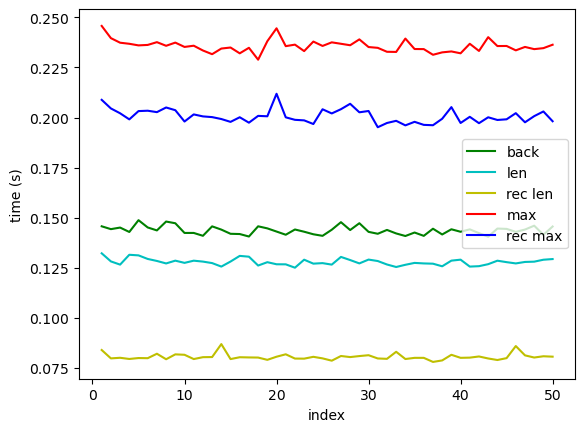

In [36]:
plt.plot(index, time_lis_back, 'g', label='back')
plt.plot(index, time_lis_len, 'c', label='len')
plt.plot(index, time_lis_rec_len, 'y', label='rec len')
plt.plot(index, time_lis_max, 'r', label='max')
plt.plot(index, time_lis_rec_max, 'b', label='rec max')

plt.xlabel("index")
plt.ylabel("time (s)")

plt.legend()